In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/Crime_Dataset_Sol-2(0,Mode,Mode).csv')

In [ ]:
df1.head()

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION
0,3/1/2020,Wilshire,VEHICLE - STOLEN,0,M,O,AA,Adult Arrest,1900 S LONGWOOD AV
1,2/8/2020,Central,BURGLARY FROM VEHICLE,47,M,O,IC,Invest Cont,1000 S FLOWER ST
2,11/4/2020,Southwest,BIKE - STOLEN,19,X,X,IC,Invest Cont,1400 W 37TH ST
3,3/10/2020,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,IC,Invest Cont,14000 RIVERSIDE DR
4,8/17/2020,Hollywood,THEFT OF IDENTITY,28,M,H,IC,Invest Cont,1900 TRANSIENT


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873665 entries, 0 to 873664
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DATE OCC      873665 non-null  object
 1   AREA NAME     873665 non-null  object
 2   Crm Cd Desc   873665 non-null  object
 3   Vict Age      873665 non-null  int64 
 4   Vict Sex      873665 non-null  object
 5   Vict Descent  873665 non-null  object
 6   Status        873665 non-null  object
 7   Status Desc   873665 non-null  object
 8   LOCATION      873665 non-null  object
dtypes: int64(1), object(8)
memory usage: 60.0+ MB


### Jumlah Korban berdasarkan Jenis Kelamin

Melihat bagaimana persebaran korban berdasarkan <font color='red'> **jenis kelamin** </font>

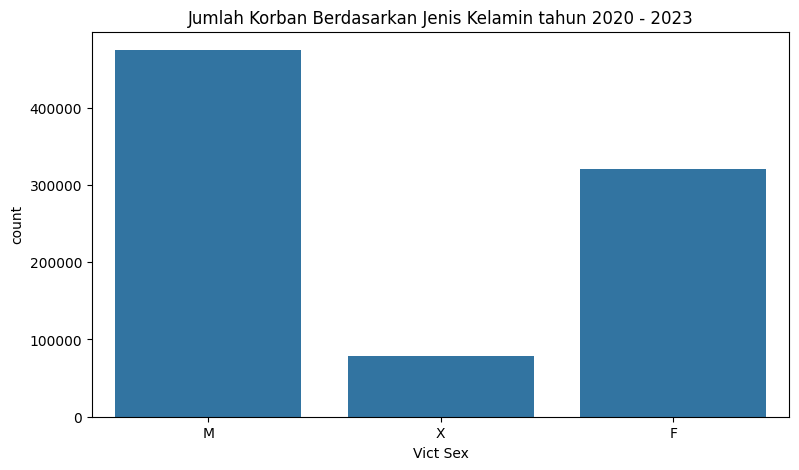

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data=df1, x='Vict Sex')
plt.title('Jumlah Korban Berdasarkan Jenis Kelamin tahun 2020 - 2023')
plt.show()

ternyata benyak dari korban laki-laki. Hal ini bisa dikaitkan dengan banyak hal, termasuk dengan curfew/waktu malam yang mana kebanyakan dari laki-laki tidak mempedulikan waktu malam.

In [ ]:
victim_sex_counts = df1['Vict Sex'].value_counts()
print(victim_sex_counts)

M    474524
F    320786
X     78355
Name: Vict Sex, dtype: int64


In [ ]:
explode = [0.1, 0, 0]
palette_color = sns.color_palette('dark')

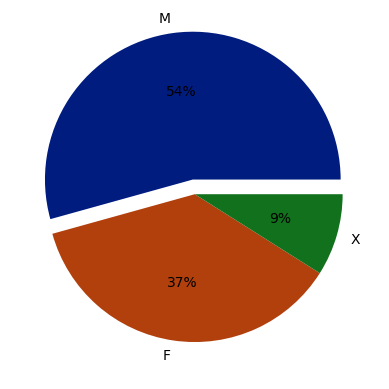

In [ ]:
plt.pie(victim_sex_counts, labels=victim_sex_counts.index, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.show()

Jumlah korban laki-laki itu sendiri melebihi setengah dari jumlah keseluruhan tindak kriminal.

### Jenis Crime terbesar

Selanjutnya melihat bagaimana, apa Crime terbanyak yang terjadi.

In [ ]:
crime_desc_counts_semua = df1['Crm Cd Desc'].value_counts()
print(crime_desc_counts_semua)

VEHICLE - STOLEN                                      93557
BATTERY - SIMPLE ASSAULT                              69401
THEFT OF IDENTITY                                     54743
BURGLARY FROM VEHICLE                                 53912
BURGLARY                                              53337
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
FAILURE TO DISPERSE                                       3
DISHONEST EMPLOYEE ATTEMPTED THEFT                        2
Name: Crm Cd Desc, Length: 138, dtype: int64


In [ ]:
sex_crimes = df1[df1['Crm Cd Desc'].str.contains('SEX', case=False)]

In [ ]:
jumlah = len(sex_crimes)
print("nukmber of Crimes containing the word 'SEX':", jumlah)

nukmber of Crimes containing the word 'SEX': 7870


### Jumlah Korban berdasarkan Umur

Melihat bagaimana persebaran victim berdasarkan range umur, dengan 0 menjadi unknown

In [ ]:
age_ranges = [(0, 0), (1, 18), (19, 30), (31, 40), (41, 50), (51, 100)]

In [ ]:
def categorize_age(age):
    for i, (start, end) in enumerate(age_ranges):
        if start <= age <= end:
            if start == end:
                return str(start)
            else:
                return f'{start}-{end}'
    return 'Unknown'

In [ ]:
df1['Age Range'] = df1['Vict Age'].apply(categorize_age)

In [ ]:
grouped_data = df1.groupby(['Age Range', 'Status']).size().unstack(fill_value=0)

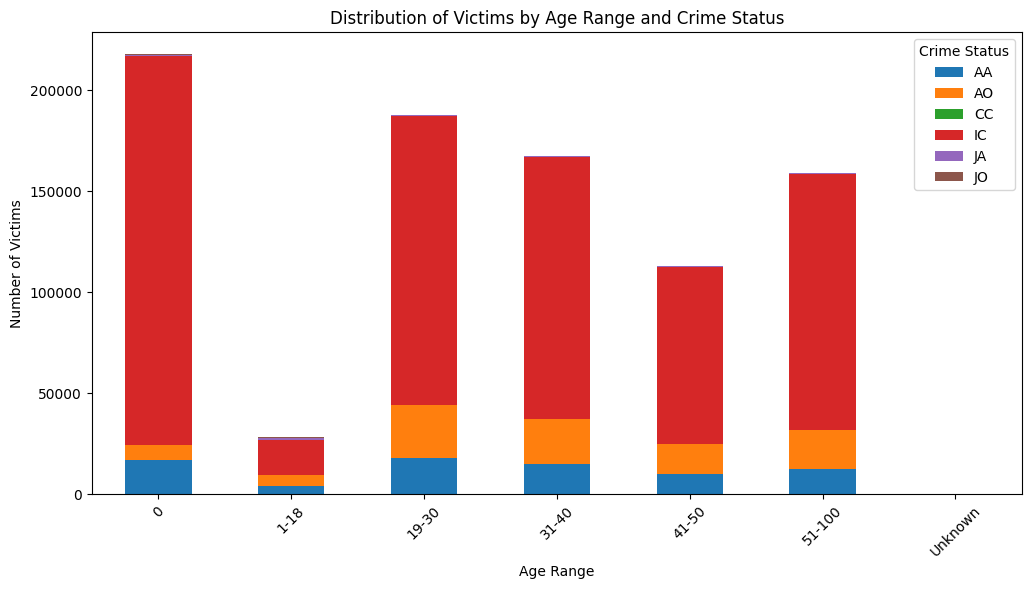

In [ ]:
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Victims by Age Range and Crime Status')
plt.xlabel('Age Range')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.legend(title='Crime Status')
plt.show()

ternyata banyak kasus yang tidak di spesifikasikan umurnya, dengan 0 menjadi crime victim dengan jumlah terbanyak

In [ ]:
df2 = df1[df1['Vict Age']==0]

In [ ]:
crime_desc_counts = df2['Crm Cd Desc'].value_counts()
print(crime_desc_counts)

VEHICLE - STOLEN                                           93271
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            19000
BURGLARY                                                   16683
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                   14608
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    13013
                                                           ...  
RAPE, ATTEMPTED                                                1
BIKE - ATTEMPTED STOLEN                                        1
TELEPHONE PROPERTY - DAMAGE                                    1
DISHONEST EMPLOYEE ATTEMPTED THEFT                             1
CONTRIBUTING                                                   1
Name: Crm Cd Desc, Length: 133, dtype: int64


dan untuk crime yang umur tidak diketahui itu terjadi paling banyak pada pencurian kendaraan, kemudian diikuti oleh Maling dari kendaraan bermotor dan perampokan

In [ ]:
top_crimes = crime_desc_counts.head(3)

In [ ]:
top_crimes

VEHICLE - STOLEN                                   93271
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)    19000
BURGLARY                                           16683
Name: Crm Cd Desc, dtype: int64

In [ ]:
dataframe_0 = pd.DataFrame({'index' : top_crimes.index, 'count': top_crimes.values})

In [ ]:
dataframe_0

,index,count
0,VEHICLE - STOLEN,93271
1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),19000
2,BURGLARY,16683


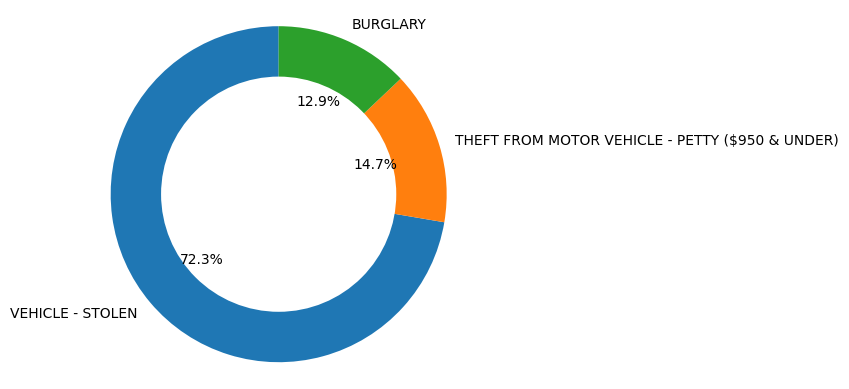

In [ ]:
labels = top_crimes.index
sizes = top_crimes.values

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a white circle in the center to create the "donut hole"
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

top 3 crime yang terjadi yang umur korban tidak dispesifikasi di datanya. Kemungkinan memang tidak diketahui atau sengaja disembunyikan.


Bagaimana dengan top 3 keseluruhan crime

In [ ]:
top_crimes_all = crime_desc_counts_semua.head(3)
top_crimes_all

VEHICLE - STOLEN            93557
BATTERY - SIMPLE ASSAULT    69401
THEFT OF IDENTITY           54743
Name: Crm Cd Desc, dtype: int64

In [ ]:
dataframe_all = pd.DataFrame({'index':top_crimes_all.index, 'count':top_crimes_all.values})

In [ ]:
dataframe_all

,index,count
0,VEHICLE - STOLEN,93557
1,BATTERY - SIMPLE ASSAULT,69401
2,THEFT OF IDENTITY,54743


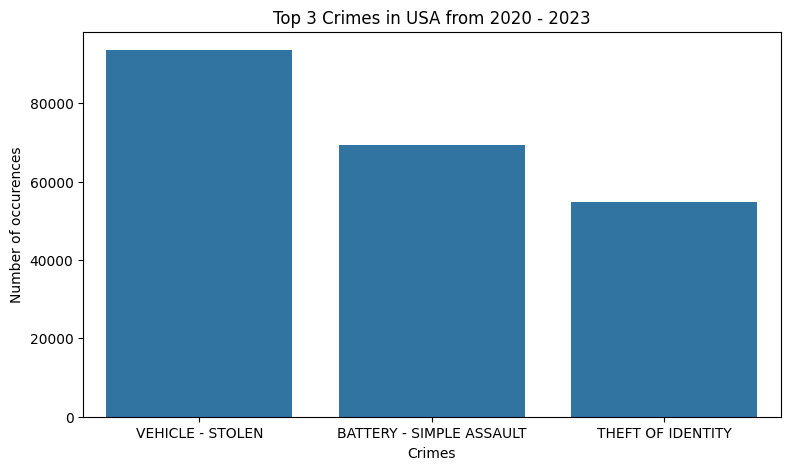

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=dataframe_all, x='index', y='count')
plt.title('Top 3 Crimes in USA from 2020 - 2023')
plt.xlabel('Crimes')
plt.ylabel('Number of occurences')
plt.show()

Ternyata crime terbanyak adalah pencurian kendaraan dengan jumlah mencapai 90ribu kejadian, diikuti dengan simple assault dan pencuarian identitas.

Bukannya ingin terlibat dengan SARA, tetapi hal racial itu sering terjadi di Amerika dengan stereotype-stereotype ras yang ada. Misalnya dengan menghubungkan dengan *African American* dengan pelaku kriminal, terus ujaran kebencian terhadap keturunan lain, seperti *Hispanic* dan *Asian*.

---

Dengan ini saya ingin mencari bagaimana persebaran korban, dari keturunan/descent mana korban paling banyak terjadi dan tindak kriminal apa yang terjadi.

In [ ]:
vict_descent_counts = df1['Vict Descent'].value_counts()
print(vict_descent_counts)

H    381989
W    177559
B    123582
X     86245
O     69136
A     19169
K      4744
F      3718
C      3446
J      1227
V       924
I       833
Z       443
P       235
U       172
D        72
G        64
L        57
S        48
-         2
Name: Vict Descent, dtype: int64


In [ ]:
top_descent = vict_descent_counts.head(3)

In [ ]:
dataframe_descent = pd.DataFrame({'index':top_descent.index, 'count':top_descent.values})

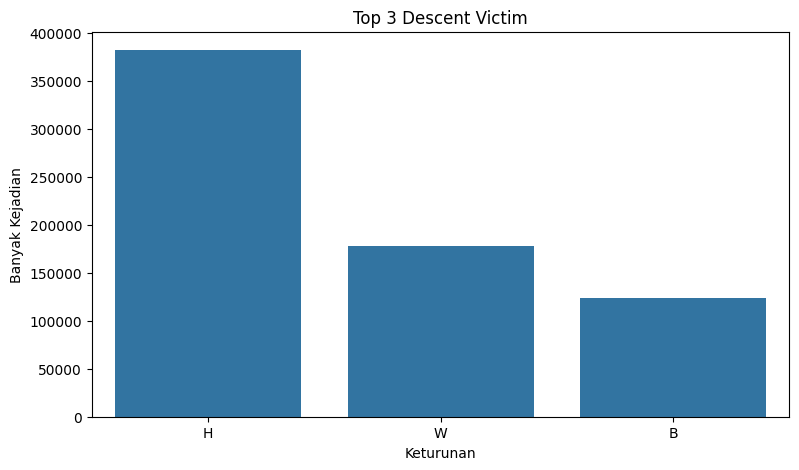

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=dataframe_descent, x='index', y='count')
plt.title('Top 3 Descent Victim')
plt.xlabel('Keturunan')
plt.ylabel('Banyak Kejadian')
plt.show()

ternyata descent victim terbanyak adalah H atau <font color='yellow'> Hispanic </font>, diikuti dengan W atau <font color='white'> White </font> dan B atau <font color='black'> Black </font>.

Untuk crime sendiri sebenarnya apa yang terjadi pada Hispanic Descent

In [ ]:
df_h = df1[df1['Vict Descent']=='H']

In [ ]:
df_h

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Age Range
4,8/17/2020,Hollywood,THEFT OF IDENTITY,28,M,H,IC,Invest Cont,1900 TRANSIENT,19-30
5,12/1/2020,Southeast,THEFT OF IDENTITY,41,M,H,IC,Invest Cont,9900 COMPTON AV,41-50
6,7/3/2020,Central,THEFT OF IDENTITY,25,M,H,IC,Invest Cont,1100 S GRAND AV,19-30
9,12/31/2020,Mission,BATTERY - SIMPLE ASSAULT,26,M,H,IC,Invest Cont,9000 CEDROS AV,19-30
11,10/1/2020,Mission,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,IC,Invest Cont,13400 RANGOON ST,1-18
...,...,...,...,...,...,...,...,...,...,...
873658,1/26/2023,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,IC,Invest Cont,12500 BRANFORD ST,19-30
873659,3/22/2023,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,IC,Invest Cont,12800 FILMORE ST,19-30
873661,12/1/2023,Hollywood,VIOLATION OF RESTRAINING ORDER,30,F,H,IC,Invest Cont,1500 N BRONSON AV,19-30
873662,7/1/2023,Central,PICKPOCKET,24,F,H,IC,Invest Cont,500 S MAIN ST,19-30


In [ ]:
df_h_crime = df_h['Crm Cd Desc'].value_counts()
print(df_h_crime)
df_h_loc = df_h['AREA NAME'].value_counts()
print(df_h_loc)

VEHICLE - STOLEN                                   93246
BATTERY - SIMPLE ASSAULT                           34773
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     24712
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)    24040
INTIMATE PARTNER - SIMPLE ASSAULT                  23040
                                                   ...  
FIREARMS RESTRAINING ORDER (FIREARMS RO)               1
THEFT, COIN MACHINE - ATTEMPT                          1
DISHONEST EMPLOYEE - PETTY THEFT                       1
TELEPHONE PROPERTY - DAMAGE                            1
GRAND THEFT / INSURANCE FRAUD                          1
Name: Crm Cd Desc, Length: 132, dtype: int64
Newton         28783
77th Street    26241
Mission        24538
Southeast      23367
Hollenbeck     23286
Rampart        21719
Central        20520
Southwest      20265
Olympic        20237
Harbor         19033
Foothill       18180
Northeast      16954
N Hollywood    16051
Van Nuys       15859
Pacific        14503
West Valley  

In [ ]:
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'])

In [ ]:
df1['Month_Year'] = df1['DATE OCC'].dt.to_period('M')

In [ ]:
df1.head()

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Age Range,Month_Year
0,2020-03-01,Wilshire,VEHICLE - STOLEN,0,M,O,AA,Adult Arrest,1900 S LONGWOOD AV,0,2020-03
1,2020-02-08,Central,BURGLARY FROM VEHICLE,47,M,O,IC,Invest Cont,1000 S FLOWER ST,41-50,2020-02
2,2020-11-04,Southwest,BIKE - STOLEN,19,X,X,IC,Invest Cont,1400 W 37TH ST,19-30,2020-11
3,2020-03-10,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,IC,Invest Cont,14000 RIVERSIDE DR,19-30,2020-03
4,2020-08-17,Hollywood,THEFT OF IDENTITY,28,M,H,IC,Invest Cont,1900 TRANSIENT,19-30,2020-08


In [ ]:
grouped_data_lain = df1.groupby('Month_Year').size()

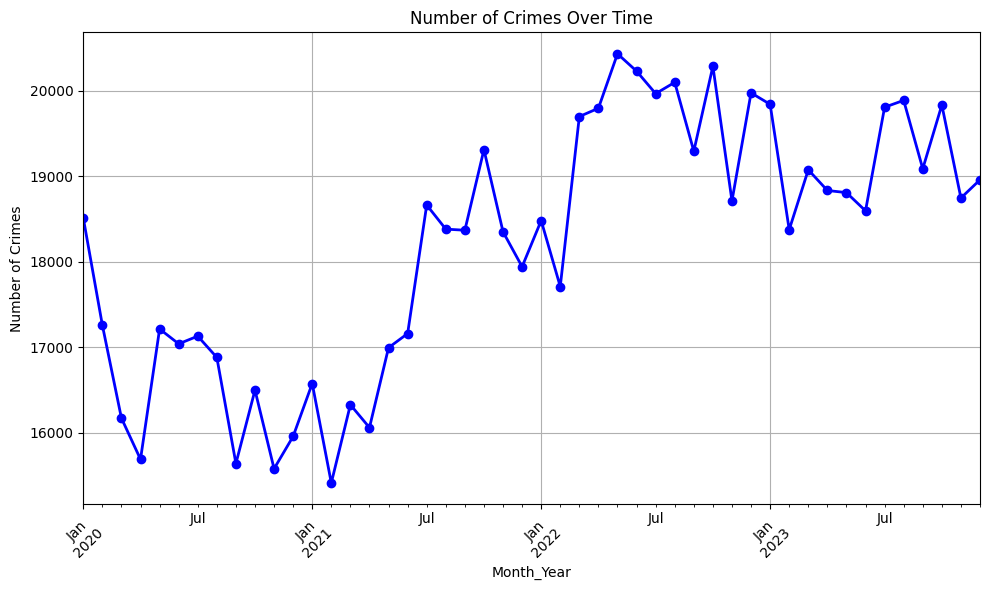

In [ ]:
plt.figure(figsize=(10, 6))
grouped_data_lain.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Number of Crimes Over Time')
plt.xlabel('Month_Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df1['Year'] = df1['DATE OCC'].dt.year

In [ ]:
grouped_data_year = df1.groupby('Year').size()

In [ ]:
average_crime_per_year = grouped_data_year.groupby('Year').mean()

In [ ]:
print("Average number of crimes per year:")
print(average_crime_per_year)

Average number of crimes per year:
Year
2020    199573.0
2021    209552.0
2022    234685.0
2023    229855.0
dtype: float64


In [ ]:
grouped_data_lagi = df1.groupby(['Month_Year', 'Vict Descent']).size().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

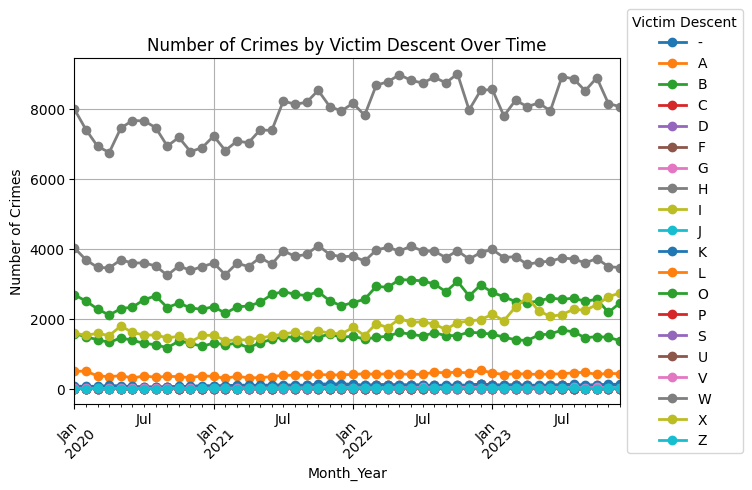

In [ ]:
plt.figure(figsize=(10, 6))
grouped_data_lagi.plot(kind='line', marker='o', linewidth=2)
plt.title('Number of Crimes by Victim Descent Over Time')
plt.xlabel('Month_Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Victim Descent', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
top_3 = grouped_data_lagi.sum().nlargest(3).index

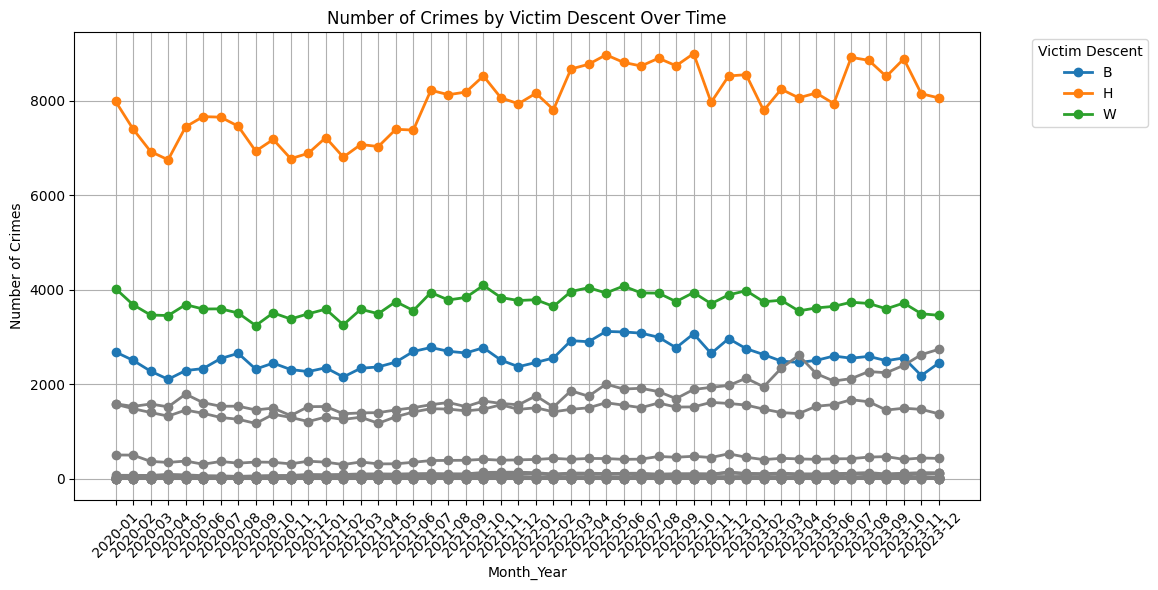

In [ ]:
plt.figure(figsize=(10, 6))
for column in grouped_data_lagi.columns:
    if column in top_3:
        plt.plot(grouped_data_lagi.index.astype(str), grouped_data_lagi[column], marker='o', linewidth=2, label=column)
    else:
        plt.plot(grouped_data_lagi.index.astype(str), grouped_data_lagi[column], marker='o', linewidth=2, color='gray')

plt.title('Number of Crimes by Victim Descent Over Time')
plt.xlabel('Month_Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Victim Descent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()